In this notebook I will be troubleshooting transformers

In [9]:
import pandas as pd
import numpy as np


In [2]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")
model = AutoModelForMaskedLM.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

/Users/anglup/Library/Caches/pypoetry/virtualenvs/pubmed-rag-iB5Z1S4t-py3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
encoded_input = tokenizer("Do not meddle in the affairs of wizards, for they are subtle and quick to anger.")
encoded_input

{'input_ids': [2, 2608, 2084, 2242, 5395, 1922, 1920, 21187, 1927, 11980, 12813, 8544, 1036, 16, 1958, 2611, 2032, 12842, 1930, 8385, 1942, 17486, 18, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [4]:
tokenizer.decode(encoded_input["input_ids"])

'[CLS] do not meddle in the affairs of wizards, for they are subtle and quick to anger. [SEP]'

In [6]:
# testing data
fpath = '/Users/anglup/GitHub/pubmed-rag/notebooks/biocjson/df_25971816.csv'

test_df = pd.read_csv(fpath)

test_df.head()

,index,section,sentence,pmid,pmcid,date,authors,journal
0,0,TITLE,KnowLife: a versatile approach for constructin...,25971816,PMC4448285,2015-05-14T00:00:00Z,Ernst P and Siu A and Weikum G,BMC Bioinformatics
1,1,ABSTRACT,Background,25971816,PMC4448285,2015-05-14T00:00:00Z,Ernst P and Siu A and Weikum G,BMC Bioinformatics
2,2,ABSTRACT,Biomedical knowledge bases (KB's) have become ...,25971816,PMC4448285,2015-05-14T00:00:00Z,Ernst P and Siu A and Weikum G,BMC Bioinformatics
3,3,ABSTRACT,Results,25971816,PMC4448285,2015-05-14T00:00:00Z,Ernst P and Siu A and Weikum G,BMC Bioinformatics
4,4,ABSTRACT,We address these three limitations by a versat...,25971816,PMC4448285,2015-05-14T00:00:00Z,Ernst P and Siu A and Weikum G,BMC Bioinformatics


In [10]:
# cleaning?
# read in example
df_test = pd.read_csv('biocjson/df_26158728.csv')
# lower case section names
df_test['section'] = df_test['section'].str.lower().str.strip()
# pmids to object
df_test['pmid'] = df_test['pmid'].astype(str)
df_test['date'] = pd.to_datetime(df_test['date'])
# also stripping sentences in case?
df_test['sentence'] = df_test['sentence'].str.strip()

punctuations = ('!',',','.','?',',','"', "'")
# lol adding a . to the end for now?
df_test['sentence'] = np.where(df_test['sentence'].str.endswith(punctuations), df_test['sentence'], df_test['sentence']+'.')

# check
df_test.head()

,index,section,sentence,pmid,pmcid,date,authors,journal
0,0,title,Heterogeneous Network Edge Prediction: A Data ...,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
1,1,abstract,The first decade of Genome Wide Association St...,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
2,2,abstract,Author Summary.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
3,3,abstract,"For complex human diseases, identifying the ge...",26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
4,4,intro,Introduction.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol


In [11]:
# which sections to keep? 
keep_sections = ['title', 'abstract', 'intro', 'results', 'discuss', 'methods']

# filter 
df_filtered = df_test[df_test['section'].isin(keep_sections)]

In [12]:
df_filtered[[len(x)==1 for x in df_filtered['sentence'].str.split(' ', )]]

,index,section,sentence,pmid,pmcid,date,authors,journal
4,4,intro,Introduction.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
11,11,results,Results.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
60,60,discuss,Discussion.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
66,66,methods,Methods.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
73,73,methods,Nodes.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
75,75,methods,Associations.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol


In [21]:
df_filtered.groupby('section').get_group('abstract').drop_duplicates()

,index,section,sentence,pmid,pmcid,date,authors,journal
1,1,abstract,The first decade of Genome Wide Association St...,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
2,2,abstract,Author Summary.,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol
3,3,abstract,"For complex human diseases, identifying the ge...",26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol


In [48]:
import os

In [49]:
def collapse_sections(
        df:pd.DataFrame, 
        out_path:str, 
        prefix:str='sectioned_'
    )->pd.DataFrame:
    """
    Given df from passages_to_df(), collapses the section into a single text block.

    PARAMS
    -----

    """

    ### PRECONDITIONS
    # dtypes
    assert isinstance(df, pd.DataFrame), f'df must be a dataframe: {df}'
    #assert_path(out_path)
    assert isinstance(prefix, str), \
        f'prefix must be a string: {prefix}'
    # other
    assert 'section' in df.columns, \
        f'"section" column does not exist in df columns: {df.columns}'
    assert 'index' in df.columns, \
        f'"index" column does not exist in df columns: {df.columns}'
    assert 'sentence' in df.columns, \
        f'"sentence" column does not exist in df columns: {df.columns}'
    assert 'pmid' in df.columns, \
        f'"pmid" column does not exist in df columns: {df.columns}'
    
    ### MAIN FUNCTION

    # get pmid
    assert df['pmid'].nunique()==1, \
        f'all pmids should be the same: {df["pmid"].unique()}'
    id = df['pmid'].unique()[0]

    # init dict
    dict_dfs = {}

    # group by section
    grouped = df.groupby('section')

    for sec in grouped:
        # verbose
        #print(sec[0])
        # sentences in order
        section_rows = sec[1].sort_values(by='index', ascending=True)
        # join the text
        section_rows['text'] = (' '.join(section_rows['sentence']))
        # remove rows (only need 1)
        section_rows = section_rows.drop_duplicates(subset=['text', 'section', ])
        # drop some cols
        section_rows = section_rows.drop(['index', 'sentence'], axis=1)
        # reset index
        section_rows = section_rows.reset_index(drop=True)
        # add to dict
        dict_dfs[sec[0]] = section_rows

    # put into one df
    collapsed = pd.concat(dict_dfs, ignore_index=True)

    # save to csv
    collapsed.to_csv(os.path.join(out_path, f'{prefix}{id}.csv'), index=False)

    return collapsed

In [50]:
collapse_sections(df_filtered, 'biocjson' )

,section,pmid,pmcid,date,authors,journal,text
0,abstract,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol,The first decade of Genome Wide Association St...
1,discuss,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol,"Discussion. In this work, we developed a frame..."
2,intro,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol,"Introduction. In the last decade, genome-wide ..."
3,methods,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol,Methods. Ethics statement. This study was appr...
4,results,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol,Results. Constructing a heterogeneous network ...
5,title,26158728,PMC4497619,2015-07-09 00:00:00+00:00,Himmelstein DS and Baranzini SE,PLoS Comput Biol,Heterogeneous Network Edge Prediction: A Data ...


In [63]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(df_filtered['sentence'].to_list())
print(embeddings)

/Users/anglup/Library/Caches/pypoetry/virtualenvs/pubmed-rag-iB5Z1S4t-py3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[[-0.05372322  0.04292255 -0.04292594 ... -0.01790819 -0.06676873
  -0.03143484]
 [-0.03226285  0.04346209 -0.01555183 ... -0.01303736 -0.08012246
  -0.04862597]
 [ 0.03367968 -0.02302507  0.0112195  ...  0.05038951 -0.02243699
  -0.07683681]
 ...
 [-0.03419891 -0.04797615  0.00387785 ... -0.03670042 -0.05710488
  -0.01789161]
 [ 0.0057573   0.00289601 -0.02519913 ...  0.0031562  -0.00100341
  -0.01703605]
 [-0.02867076 -0.0234155   0.00054238 ... -0.0735175  -0.01822935
  -0.01331902]]


In [86]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')


/Users/anglup/Library/Caches/pypoetry/virtualenvs/pubmed-rag-iB5Z1S4t-py3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [93]:

# Tokenize sentences
encoded_input = tokenizer(df_filtered['sentence'].to_list(), padding=True, truncation=False, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)


Sentence embeddings:
tensor([[-0.0537,  0.0429, -0.0429,  ..., -0.0179, -0.0668, -0.0314],
        [-0.0364,  0.0464, -0.0127,  ..., -0.0119, -0.0804, -0.0457],
        [ 0.0337, -0.0230,  0.0112,  ...,  0.0504, -0.0224, -0.0768],
        ...,
        [-0.0342, -0.0480,  0.0039,  ..., -0.0367, -0.0571, -0.0179],
        [ 0.0058,  0.0029, -0.0252,  ...,  0.0032, -0.0010, -0.0170],
        [-0.0287, -0.0234,  0.0005,  ..., -0.0735, -0.0182, -0.0133]])


In [67]:
df_filtered['section']

0         title
1      abstract
2      abstract
3      abstract
4         intro
         ...   
99      methods
100     methods
101     methods
102     methods
103     methods
Name: section, Length: 84, dtype: object

In [71]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder


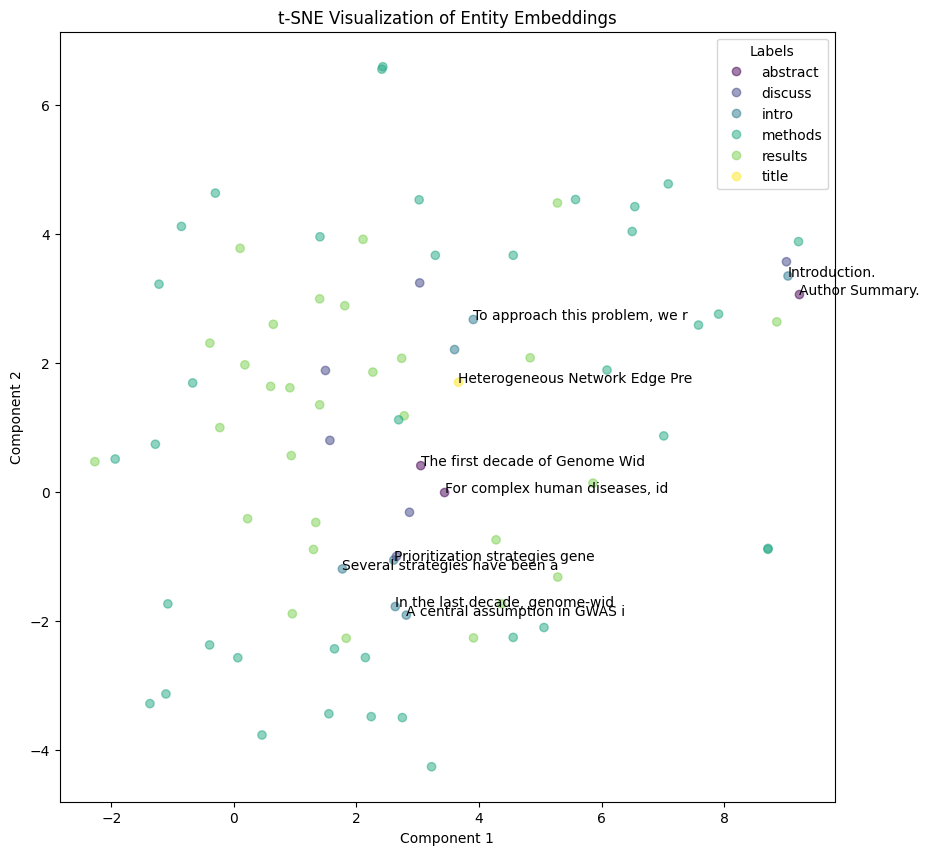

In [94]:

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
entity_embeddings_2d = tsne.fit_transform(sentence_embeddings)

# Get labels
label_encoder = LabelEncoder()
sections_enc = label_encoder.fit_transform(df_filtered['section'])


# Plot the embeddings
plt.figure(figsize=(10, 10))
scatter = plt.scatter(entity_embeddings_2d[:, 0], entity_embeddings_2d[:, 1], alpha=0.5, c=sections_enc, )

# # Annotate a few points (e.g., the first 10 entities)
for i, label in enumerate(df_filtered['sentence']):
    if i < 10:  # Change this to annotate more points
        plt.annotate(label[:30], (entity_embeddings_2d[i, 0], entity_embeddings_2d[i, 1]))

# Mapping encoded labels back to original labels in the legend
handles, _ = scatter.legend_elements()
original_labels = label_encoder.inverse_transform(range(len(handles)))

# Add a legend with the original (non-encoded) labels
plt.legend(handles, original_labels, title="Labels")

plt.title('t-SNE Visualization of Entity Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [53]:
ya = {}

max_tokens = 200

for each in df_filtered.groupby('section'):

    # verbose
    print(each[0])

    # make sure sentences are in correct order
    section_rows = each[1].sort_values(by='index', ascending=True)
    
    # for counter
    len_text = 0
    text = ""
    start = section_rows.index[0]
    end = 0

    # init the column to fill
    section_rows['text'] = 'init'

    # for each of the rows in the section df 
    for i in np.arange(0, len(section_rows)):
        # if there is room in text for more tokens
        if len_text < max_tokens:
            # get the sentence
            sent = ' ' + section_rows.loc[i, 'sentence']
            # make a copy of text
            tmp_text = text
            tmp_text += sent.strip()

            if len(sent.split(' '))
            text = text.strip()
            len_text += len(sent.split(' '))
            end = i

        else:
            start = i

            # save
            section_rows.loc[end:start, 'text'] = text

            # reset
            text = ""
            len_text = 0
            end = i

            # init text
            sent = ' ' + section_rows.loc[i, 'sentence']
            text += sent
            text = text.strip()
            len_text += len(sent.split(' '))


    # section_rows['text'] = (' '.join(section_rows['sentence']))

    # section_rows = section_rows.drop_duplicates(subset=['text', 'section', ])

    # section_rows = section_rows.drop(['index', 'sentence'], axis=1)

    # section_rows = section_rows.reset_index(drop=True)

    ya[each[0]] = section_rows

abstract


KeyError: 0

In [34]:
collapsed = pd.concat(ya, ignore_index=True)

In [36]:
test_text = collapsed.loc[3, 'text']

In [37]:
e = tokenizer(test_text)
e

{'input_ids': [2, 2860, 18, 7809, 12977, 18, 2052, 2161, 1982, 4871, 2007, 1920, 16489, 1038, 6540, 3043, 7353, 1990, 2616, 3297, 2441, 4478, 7, 2119, 17, 3472, 14743, 18, 8538, 5849, 18, 2038, 7000, 43, 3335, 6465, 1930, 4437, 4585, 4187, 8511, 1958, 7479, 8538, 5849, 18, 3189, 6378, 12414, 16, 8538, 5849, 3149, 1927, 6263, 7951, 2007, 11473, 16, 5574, 1988, 1925, 3281, 5880, 4757, 16737, 2601, 18, 6267, 2601, 2105, 13208, 1920, 6925, 1927, 14866, 7905, 16, 3417, 8269, 2601, 2105, 13208, 1920, 6925, 1927, 3303, 7905, 18, 8269, 3584, 2032, 8842, 1927, 43, 4585, 6267, 2601, 16, 2758, 6267, 2601, 16, 6925, 12, 1942, 9290, 2192, 3137, 8269, 3584, 15031, 1920, 2841, 6267, 3584, 13, 16, 1930, 4924, 12, 7201, 1958, 2321, 6554, 1930, 3075, 6264, 1919, 8269, 3584, 13, 18, 1920, 8124, 16737, 2144, 3584, 1930, 6641, 2209, 2362, 6267, 1930, 8269, 16, 4073, 13874, 16, 1956, 2496, 3980, 2601, 18, 1920, 5880, 4757, 6999, 2112, 1998, 5960, 1966, 43, 4982, 7600, 1927, 6267, 3584, 7951, 2007, 8269, 358

In [38]:
tokenizer.decode(e["input_ids"])

'[CLS] methods. ethics statement. this study was approved by the ucsf institutional review board on human subjects under protocol # 10 - 00104. heterogeneous networks. we created a general framework and open source software package for representing heterogeneous networks. like traditional graphs, heterogeneous networks consist of nodes connected by edges, except that an additional meta layer defines type. node type signifies the kind of entity encoded, whereas edge type signifies the kind of relationship encoded. edge types are comprised of a source node type, target node type, kind ( to differentiate between multiple edge types connecting the same node types ), and direction ( allowing for both directed and undirected edge types ). the user defines these types and annotates each node and edge, upon creation, with its corresponding type. the meta layer itself can be represented as a graph consisting of node types connected by edge types. when referring to this graph of types, we use th